# Homework 4

By Yanhao Miao

## Question 1 Exploratory Data Analysis

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zf = zipfile.ZipFile('/Users/miaoyanhao/Desktop/input/compustat.zip') # get the zip file
# open the csv without unzipping, and choose 
rawdf = pd.read_csv(zf.open('compustat.csv'))

In [3]:
rawdf.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [4]:
# select the var names we are interested in
df = rawdf[["sic","datacqtr","cusip","cshoq","saleq","prccq"]]
df.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


2 For saleq and market cap, compute the following:
Time series mean
Time Series standard deviation
Time Series count of missing values
Time Series ratio of missing values
Aggregate the result in a dataframe

In [5]:
# compute market cap = prccq * cshoq
df["marketcap"] = df["cshoq"] * df["prccq"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
saleq_mean = df['saleq'].dropna().mean()
marketcap_mean = df['marketcap'].dropna().mean()
saleq_std = df['saleq'].dropna().std()
marketcap_std = df['marketcap'].dropna().std()
saleq_nan = df['saleq'].isna().sum()
marketcap_nan = df['marketcap'].isna().sum()
saleq_nan_ratio = saleq_nan/len(df['saleq'])
marketcap_nan_ratio = marketcap_nan/len(df['marketcap'])

In [7]:
# Aggregate the result in a dataframe
res = pd.DataFrame(data = [[saleq_mean, marketcap_mean], [saleq_std, marketcap_std],[saleq_nan, marketcap_nan],
                   [saleq_nan_ratio, marketcap_nan_ratio]], index = 
                   ["mean","std","number of missing","ratio of missing"], columns = ["saleq", "marketcap"])
print(res)

                           saleq      marketcap
mean                  445.150664    2057.473104
std                  2679.706576   13202.197457
number of missing  269498.000000  468276.000000
ratio of missing        0.148787       0.258530


Answer the following questions:
Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
Implement some schemes to detect outliers.
Do you find some outliers? Could you think why? You can do some research using google.
What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

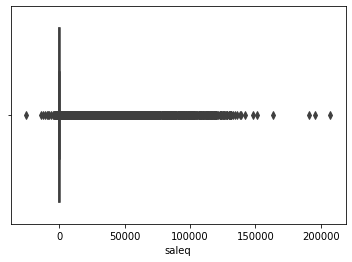

In [8]:
# 1. use box plot to detect outliers
import seaborn as sns
sns.boxplot(x = df['saleq'])

In [9]:
Q1=df['saleq'].quantile(0.25)
Q3=df['saleq'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound, Upper_bound)

3.21
130.53
127.32000000000001
-187.77 321.51


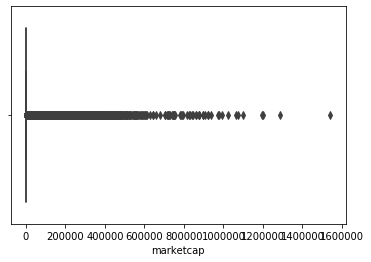

In [10]:
sns.boxplot(x = df['marketcap'])

In [11]:
Q1=df['marketcap'].quantile(0.25)
Q3=df['marketcap'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound, Upper_bound)

20.007009
525.7137662499999
505.70675724999995
-738.5531268749999 1284.273902125


In [12]:
# 2. check the Z-score
from scipy import stats
saleq_df = pd.DataFrame(df['saleq'].dropna())
z = np.abs(stats.zscore(saleq_df))

# Any point outside of 3 standard deviations would be an outlier
threshold = 3
saleq_outliers = saleq_df[(z > threshold)]
saleq_outlier_ratio = saleq_outliers.shape[0] / saleq_df.shape[0]

marketcap_df = pd.DataFrame(df['marketcap'].dropna())
z = np.abs(stats.zscore(marketcap_df))

# Any point outside of 3 standard deviations would be an outlier
threshold = 3
marketcap_outliers = marketcap_df[(z > threshold)]
marketcap_outlier_ratio = marketcap_outliers.shape[0] / marketcap_df.shape[0]

print(saleq_outlier_ratio)
print(marketcap_outlier_ratio)

0.00979244403136332
0.009401179279878304


## Question 2 Compute Industry Concentration

In [13]:
df["2dsic"] = df['sic'].astype('str').str[0:2]

df_HHI = pd.DataFrame(data = df, columns = ["2dsic", "datacqtr", "marketcap"]).dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_HHI.head(10)

,2dsic,datacqtr,marketcap
18,30,1970Q3,26.202500
19,30,1970Q4,24.460000
20,30,1971Q1,34.193250
21,30,1971Q2,29.023500
22,30,1971Q3,16.256875
23,30,1971Q4,17.221250
24,30,1972Q1,16.768125
25,30,1972Q2,17.736000
26,30,1972Q3,15.534750
27,30,1972Q4,14.872750


In [15]:
# compute the industry market cap for every datacqtr
df_HHI["induscap"] = df_HHI.groupby(["2dsic","datacqtr"])["marketcap"].transform('sum')
# compute the squared market share
df_HHI["marketshare"] = (df_HHI['marketcap'] / df_HHI["induscap"] * 100) ** 2
# sum over
df_HHI["HHI"] = df_HHI.groupby(["2dsic","datacqtr"])["marketshare"].transform('sum')

In [16]:
df_HHI.head()

,2dsic,datacqtr,marketcap,induscap,marketshare,HHI
18,30,1970Q3,26.202500,6289.293375,0.173573,1682.455305
19,30,1970Q4,24.460000,8067.256308,0.091931,1424.771672
20,30,1971Q1,34.193250,8700.795835,0.154441,1292.447644
21,30,1971Q2,29.023500,9039.093803,0.103098,1296.213826
22,30,1971Q3,16.256875,9224.606151,0.031058,1289.251544


In [17]:
HHI_indusmean = df_HHI.groupby(["2dsic"])["HHI"].mean()
HHI_indusmean = HHI_indusmean.sort_values(ascending=False)
HHI_indusmean.head(10)

2dsic
89    10000.000000
86    10000.000000
81     9134.847753
na     9057.202929
84     8800.118852
90     8726.336351
41     6732.737001
21     5557.949104
76     4897.123485
52     4040.480952
Name: HHI, dtype: float64

So the top 4 industry should be: 81, 84, 90, 41

In [18]:
HHI_81 = df_HHI[df_HHI["2dsic"] == '81']
HHI_84 = df_HHI[df_HHI["2dsic"] == '84']
HHI_90 = df_HHI[df_HHI["2dsic"] == '90']
HHI_41 = df_HHI[df_HHI["2dsic"] == '41']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

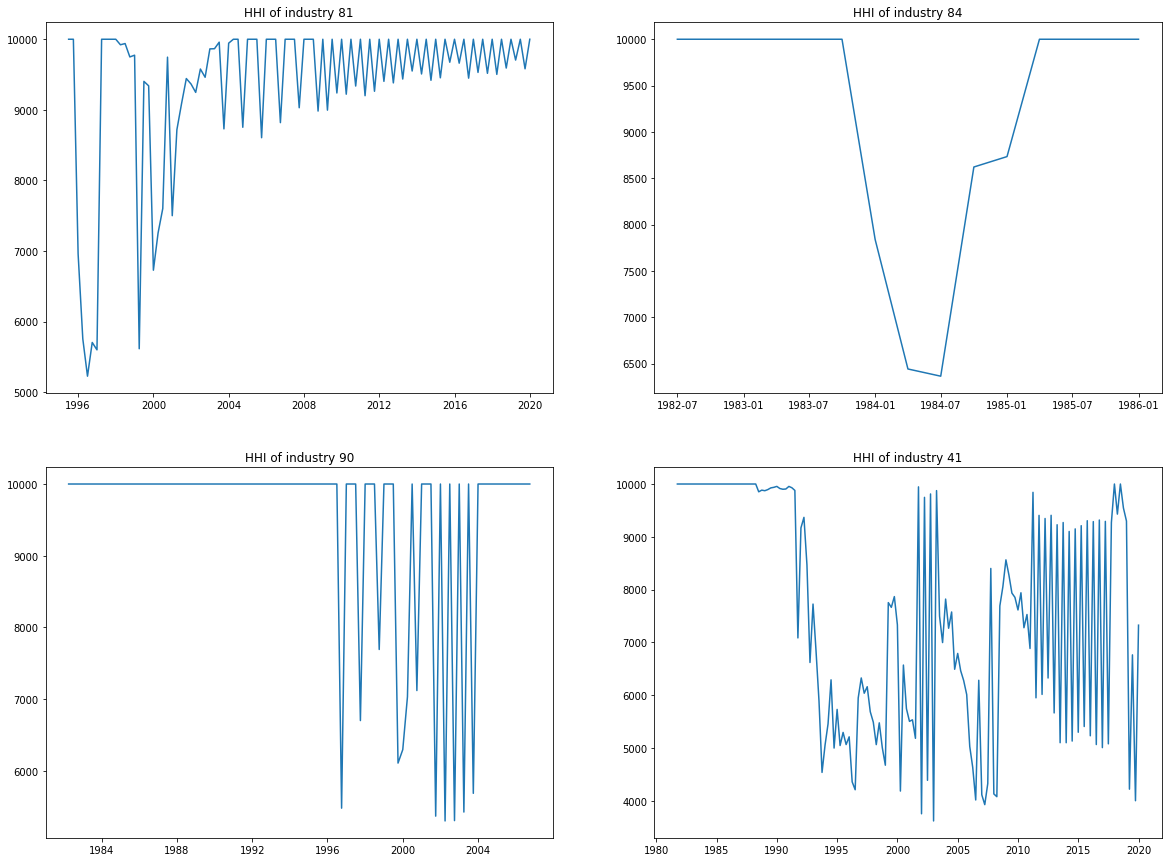

In [19]:
# plot the time series
plt.figure(figsize=(20,15))
i = 1
siclist = [81, 84, 90, 41]
# obtain the standard datetime 
for data in [HHI_81, HHI_84, HHI_90, HHI_41]:
    data['standard time'] = pd.to_datetime(data['datacqtr'])
    data = data.sort_values(by = 'standard time', ignore_index = True)
    plt.subplot(2,2,i)
    plt.plot(data['standard time'], data['HHI'])
    plt.title(f'HHI of industry {siclist[i-1]}')
    i+=1